# Session 10 - Using BERT-style models via ```Huggingface```

In the lecture today, we saw how exploring the different layers and self-attention heads in BERT-style models can gives us a more nuanced breakdown of how the model has performed and what it has learned.

There are three main tools which can be used for this task:

- BERTviz
    - https://github.com/jessevig/bertviz
- Ecco
    - https://github.com/jalammar/ecco
- Language Interpretability Toolkit (LIT)
    - https://github.com/PAIR-code/lit

Each of these has empirical results in peer reviewed journals as evidence of robustness, but each does something a little different. Feel free to explore them in this class, or in your own time.

A second thing we saw was that BERT (and BERT-style) models can be *finetuned* in order to perform specific tasks. In this class, we're going to see how this can be used for the purposes of cultural data science. To do this, we're going to be using the library called ```HuggingFace``` or sometimes just ```🤗```.

## Creating ```HuggingFace``` pipelines

We're specifically going to use the ```pipelines()``` abstraction in HuggingFace. This allows us to load a finetuned model, initialize it with the necessary requirements, and use it for the specific task for which it was finetuned. You can read more [here](https://huggingface.co/docs/transformers/v4.27.2/en/task_summary#natural-language-processing).

We're going to use the ```text-classification``` pipeline in this class (and [Assignment 4](https://classroom.github.com/a/BhnScEmU)).

In [2]:
from transformers import pipeline
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

/home/coder/.local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-05-26 19:28:14.234974: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


So far, we've only been using the default models and parameters for these tasks. But if you check out the ```HuggingFace``` model universe, you'll see that there are many (in some cases hundreds) of finetuned models which can be slotted into these pipelines.

Check out the options [here](https://huggingface.co/models).

In [9]:
classifier = pipeline("text-classification", 
                      model="j-hartmann/emotion-english-distilroberta-base", 
                      return_all_scores=False)

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at j-hartmann/emotion-english-distilroberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
/home/coder/.local/lib/python3.9/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [5]:
filename = os.path.join("..", "in", "fake_or_real_news.csv")
#docs = pd.read_csv(filename)["title"]
data = pd.read_csv(filename, index_col=0)

In [6]:
data.sample(10)

,title,text,label
8053,Putin “Collecting” Former US Allies,How Putin’s Plan to Collect Former US Allies C...,FAKE
1794,What advantages does Scott Walker offer?,"Every GOP presidential candidate, most especia...",REAL
3282,Leaked: What’s in Obama’s trade deal,A recent draft of the Trans-Pacific Partnershi...,REAL
5587,Insurers use California’s assisted-suicide law...,Legal Insurrection – by Leslie Eastman \nAbout...,FAKE
2870,California Airport Security Tightened Amid ISI...,CNN said the investigation started after inter...,REAL
5258,Clinton doubles down on disputed claim FBI fou...,Hillary Clinton has doubled down on her assert...,REAL
1646,Should NBC have let Donald Trump host 'Saturda...,Although Donald Trump's punch lines drew few l...,REAL
9698,BREAKING : Trump BEATING “Federal Investigatio...,BREAKING : Trump BEATING “Federal Investigatio...,FAKE
5020,'The only other option': Bernie Sanders backer...,Vanessa Tijerina was not politically active un...,REAL
9127,IRANIAN MISSILE ACCIDENTALLY DESTROYS IRANIAN ...,jewsnews © 2015 | JEWSNEWS | It's not news...u...,FAKE


In [7]:
# turning the headlines into a list of strings 
headlines = data['title'].astype(str).values.tolist()
label = data['label']


In [10]:
emotion = classifier(headlines)

In [11]:
# Create DataFrame with texts, predictions, labels, and scores
df = pd.DataFrame(list(zip(headlines,label, emotion)), columns=['title', 'label', 'emotion'])
df.head()

,title,label,emotion
0,You Can Smell Hillary’s Fear,FAKE,"{'label': 'fear', 'score': 0.9332622289657593}"
1,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE,"{'label': 'sadness', 'score': 0.5515188574790955}"
2,Kerry to go to Paris in gesture of sympathy,REAL,"{'label': 'joy', 'score': 0.5707700848579407}"
3,Bernie supporters on Twitter erupt in anger ag...,FAKE,"{'label': 'anger', 'score': 0.9814165830612183}"
4,The Battle of New York: Why This Primary Matters,REAL,"{'label': 'neutral', 'score': 0.5700178742408752}"


In [15]:
df['emotion'] = df['emotion'].apply(lambda x: x['label'])

In [16]:
df.head()

,title,label,emotion
0,You Can Smell Hillary’s Fear,FAKE,fear
1,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE,sadness
2,Kerry to go to Paris in gesture of sympathy,REAL,joy
3,Bernie supporters on Twitter erupt in anger ag...,FAKE,anger
4,The Battle of New York: Why This Primary Matters,REAL,neutral


<Axes: >

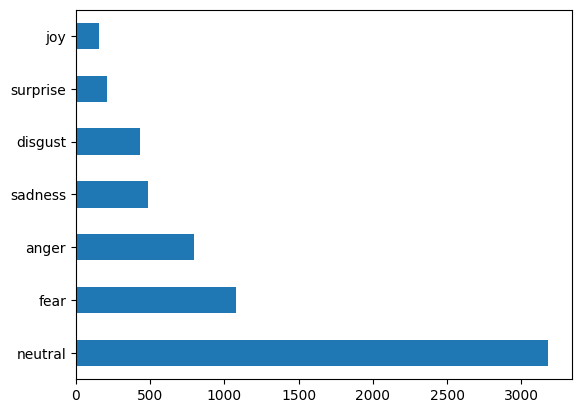

In [17]:
df['emotion'].value_counts().plot(kind='barh')

<Axes: xlabel='emotion', ylabel='count'>

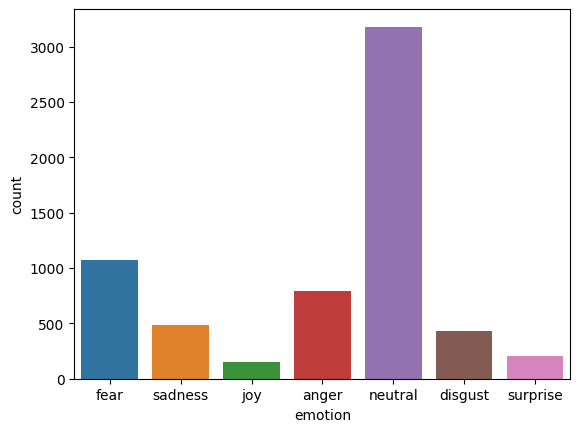

In [18]:
sns.countplot(x=df['emotion'])

In [19]:
df_fake = df[df['label'] == 'FAKE']

<Axes: xlabel='emotion', ylabel='count'>

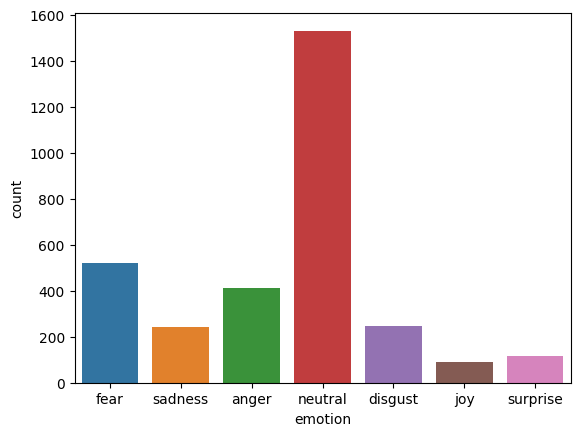

In [21]:
sns.countplot(x=df_fake['emotion'])

<Axes: >

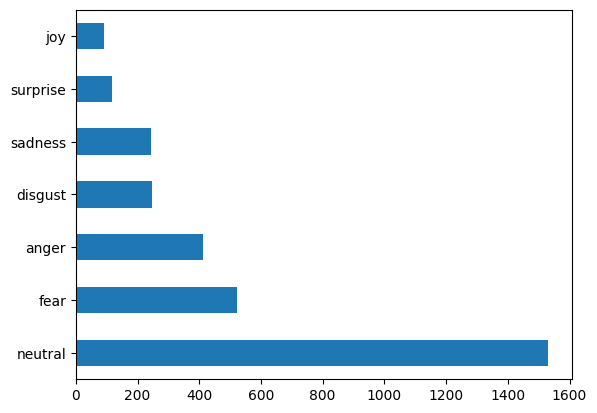

In [22]:
df_fake['emotion'].value_counts().plot(kind='barh')

In [23]:
df_real = df[df['label'] == 'REAL']

<Axes: xlabel='emotion', ylabel='count'>

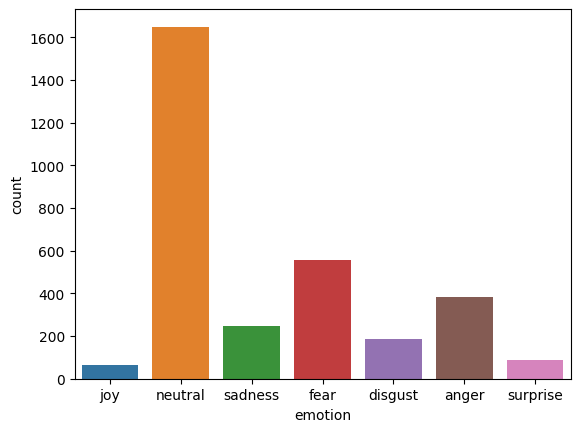

In [25]:
sns.countplot(x=df_real['emotion'])

<Axes: >

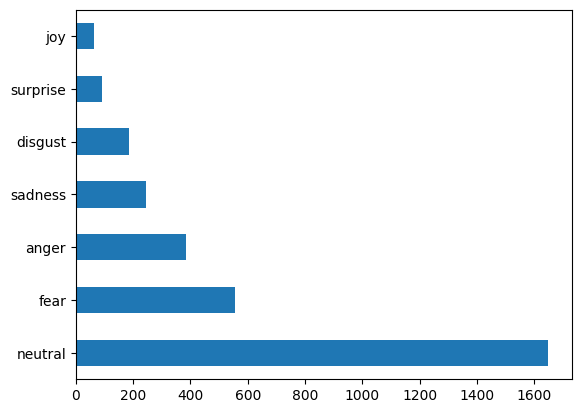

In [26]:
df_real['emotion'].value_counts().plot(kind='barh')